In [1]:
# paper on LGBM:
# https://papers.nips.cc/paper/2017/file/6449f44a102fde848669bdd9eb6b76fa-Paper.pdf

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [12]:
from pickle import load
from pickle import dump
from myTools import *
import datetime

from lightgbm import LGBMClassifier

In [59]:
dfApplication = load(open('dfApplicationTrain.pkl','rb'))

In [60]:
dfApplicationDefault = load(open('dfApplicationDefault.pkl','rb'))
dfApplicationDefault = dfApplicationDefault.merge(dfApplication[['SK_ID_CURR']], left_on='SK_ID_CURR', right_on='SK_ID_CURR')

# Evaluation sur les jeux de données par défaut et travaillés + paramètres optimisés précédemment

In [5]:
results = []

In [5]:
model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, subsample_for_bin=25000, n_estimators=150, n_jobs=-1)

res = evaluateRocPrCurves(dfApplicationDefault, model=model, title_plot='Default data', display_plot=False, target='TARGET', identifier='SK_ID_CURR')
results.append(res)

res = evaluateRocPrCurves(dfApplication, model=model, title_plot='Worked data', display_plot=False, target='TARGET', identifier='SK_ID_CURR')
results.append(res)

pd.concat(results).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

,title,roc_auc_train,roc_auc_test,pr_auc_train,pr_auc_test,time_train,time_pred,nb_feat,nb_train,timestamp
0,Default data,0.793640,0.770315,0.303131,0.259309,3.712426,1.561177,203.0,135073.333333,1.625816e+09
1,Worked data,0.800595,0.775974,0.311465,0.265771,4.056469,1.657060,229.0,135073.333333,1.625816e+09


# Suppression des features avec importance nulle

In [15]:
def imputeScaleAndEncode(df1, 
                    target='', 
                    identifier=''):
    
    df = df1.copy()
    
    if type(target) == str:
        target = [target]
    if type(identifier) == str:
        identifier = [identifier]
    
    colToExclude = target
    colToExclude.extend(identifier)
    
    for col in df.columns:
        if col not in colToExclude:
            if df[col].dtypes == 'object':
                df[col] = df[col].replace(np.nan, 'missing')
                df[col] = OrdinalEncoder().fit_transform(df[[col]])
            elif df[col].dtype in ['int64','float64']:
                df[col] = SimpleImputer(strategy='mean').fit_transform(df[[col]])
                df[col] = MinMaxScaler().fit_transform(df[[col]])  
                
    return df


In [16]:
#https://www.kaggle.com/kylegilde/extracting-scikit-feature-names-importances
#https://towardsdatascience.com/extracting-feature-importances-from-scikit-learn-pipelines-18c79b4ae09a
#https://towardsdatascience.com/how-to-get-feature-importances-from-any-sklearn-pipeline-167a19f1214

In [17]:
model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, subsample_for_bin=25000, n_estimators=150, n_jobs=-1)
imp = featureImportance(imputeScaleAndEncode(dfApplication, target='TARGET', identifier='SK_ID_CURR'), target='TARGET', identifier='SK_ID_CURR', model=model)
imp[['feature','impMean']]

,feature,impMean
0,EXT_SOURCE_2,53.0
1,EXT_SOURCE_3,53.0
2,EXT_SOURCE_1,52.0
3,POSCASH_CNT_INSTALMENT_FUTURE,39.0
4,DAYS_BIRTH,36.0
5,AMT_CREDIT,35.0
6,INSTALPAYMT_DIFF_DAYS_INSTALLMENT_PAYMENT_NEG,35.0
7,PREVBURO_LAST_DAYS_DECISION,24.0
8,POSCASH_CNT_INSTALMENT_FUTURE_LEFT,22.0
9,PREV_AMT_COMPLETED,22.0


In [18]:
cols = ['SK_ID_CURR','TARGET']
cols.extend(list(imp[imp.impMean > 0].feature))
cols

['SK_ID_CURR',
 'TARGET',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'POSCASH_CNT_INSTALMENT_FUTURE',
 'DAYS_BIRTH',
 'AMT_CREDIT',
 'INSTALPAYMT_DIFF_DAYS_INSTALLMENT_PAYMENT_NEG',
 'PREVBURO_LAST_DAYS_DECISION',
 'POSCASH_CNT_INSTALMENT_FUTURE_LEFT',
 'PREV_AMT_COMPLETED',
 'AMT_ANNUITY',
 'CODE_GENDER',
 'DAYS_EMPLOYED',
 'AMT_GOODS_PRICE',
 'CREDCARD_CNT_DRAWINGS_ATM_CURRENT',
 'INSTALPAYMT_DIFF_AMT_INSTALLMENT_PAYMENT_POS',
 'POSCASH_SK_DPD_DEF',
 'BURO_AMT_CREDIT_MAX_OVERDUE',
 'PREV_AMT_CREDIT_ACTIVE_REIMBURSED_INDIC',
 'NB_DOC_FURNISHED',
 'BURO_AMT_CREDIT_ACTIVE',
 'BURO_AMT_CREDIT_COMPLETED',
 'BURO_AMT_CREDIT_SUM_DEBT',
 'BURO_AMT_CREDIT_SUM',
 'NAME_EDUCATION_TYPE',
 'POSCASH_CNT_INSTALMENT_FUTURE_DONE',
 'PREV_AMT_ANNUITY',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'PREV_NAME_YIELD_GROUP_ORD',
 'BURO_DAYS_CREDIT',
 'PREV_AMT_DOWN_PAYMENT',
 'PREVBURO_DAYS_DIFF',
 'OCCUPATION_TYPE',
 'CREDCARD_MONTHS_BALANCE',
 'NAME_FAMILY_STATUS',
 'PREV_CODE_REJECT_REASON',
 'BURO_AM

In [19]:
for index, row in imp.iterrows():
    if row.impMean == 0:
        del dfApplication[row.feature]

In [ ]:
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='Data importance > 0', display_plot=False, target='TARGET', identifier='SK_ID_CURR')

results.append(res)
pd.concat(results).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

# Optimisation des paramètres

In [12]:
def evaluate(model, title): 
        
    return evaluateRocPrCurves(dfApplication, 
                                target='TARGET', 
                                identifier='SK_ID_CURR', 
                                model=model,
                                display_plot=False,
                                title_plot = title,
                                cv=10)

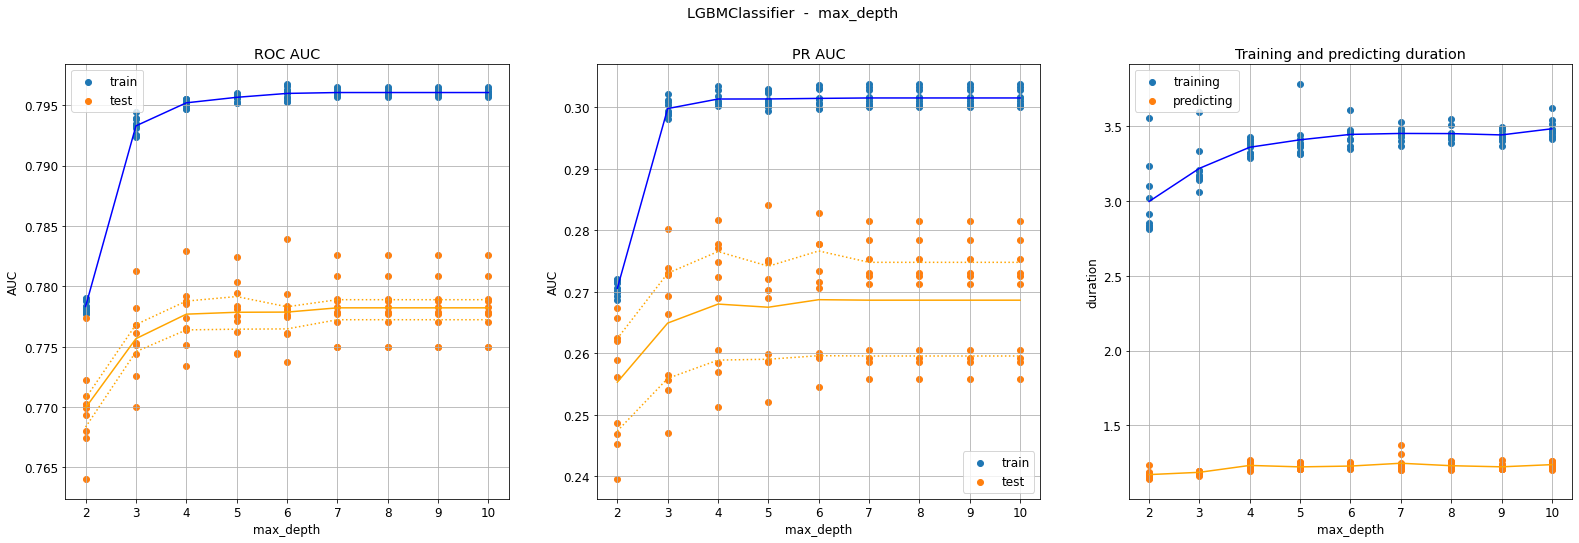

In [19]:
results_tmp = []
lst = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for param_value in lst:
    model = LGBMClassifier(max_depth=param_value, learning_rate=0.1, num_leaves=8, subsample_for_bin=25000, n_estimators=150, n_jobs=-1)
    title = 'LGBMClassifier | max_depth = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

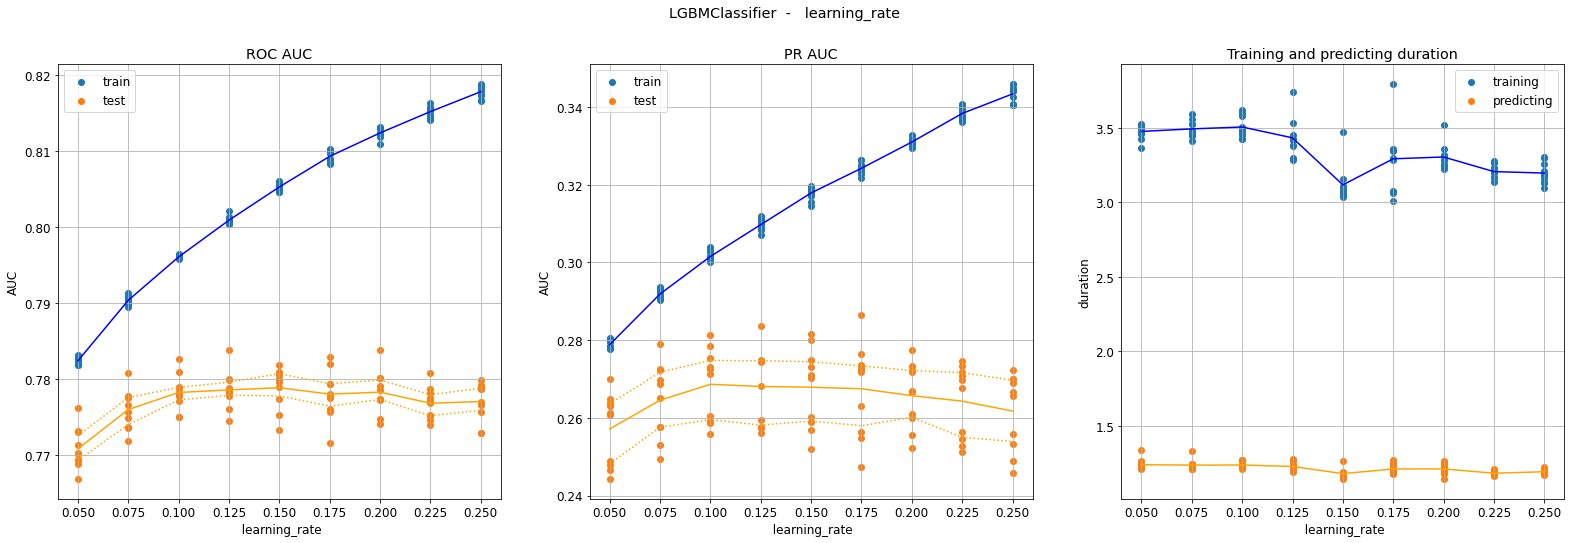

In [22]:
results_tmp = []
lst = [0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25]
for param_value in lst:
    model = LGBMClassifier(max_depth=7, learning_rate=param_value, num_leaves=8, subsample_for_bin=25000, n_estimators=150, n_jobs=-1)
    title = 'LGBMClassifier |  learning_rate = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results_tmp.extend(results_tmp)

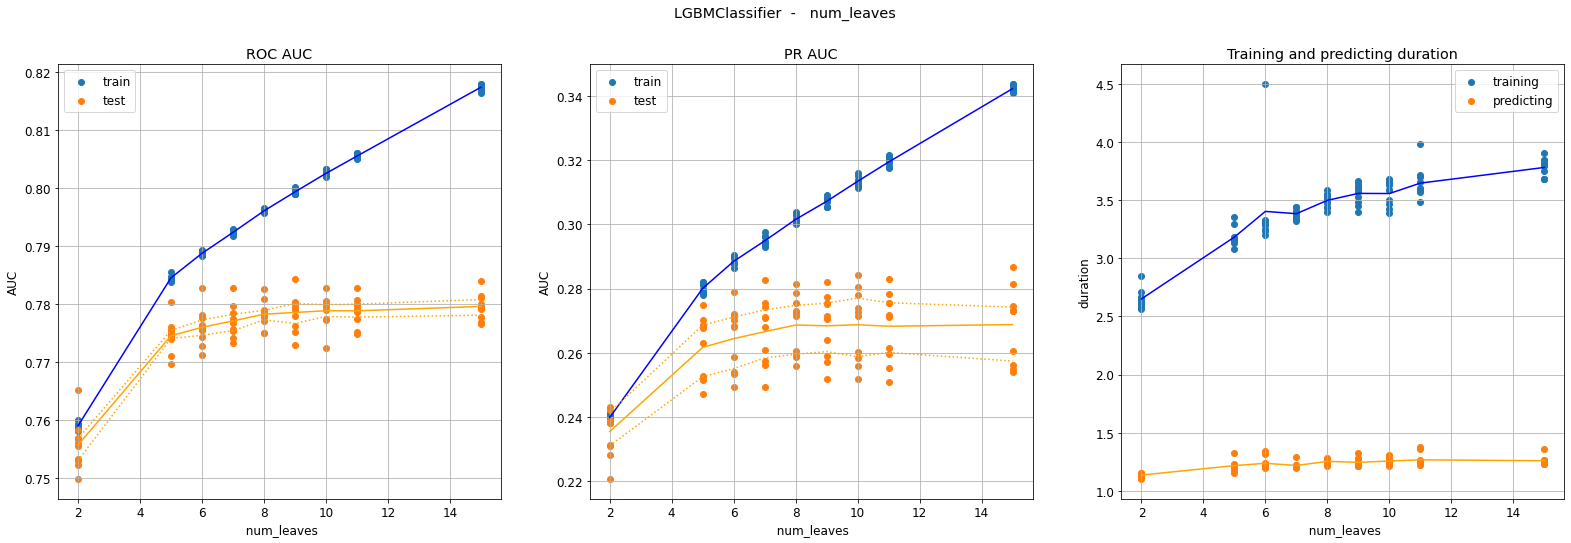

In [23]:
results_tmp = []
lst = [2, 5, 6, 7, 8, 9, 10, 11, 15]
for param_value in lst:
    model = LGBMClassifier(max_depth=7, learning_rate=0.1, num_leaves=param_value, subsample_for_bin=25000, n_estimators=150, n_jobs=-1)
    title = 'LGBMClassifier |  num_leaves = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)


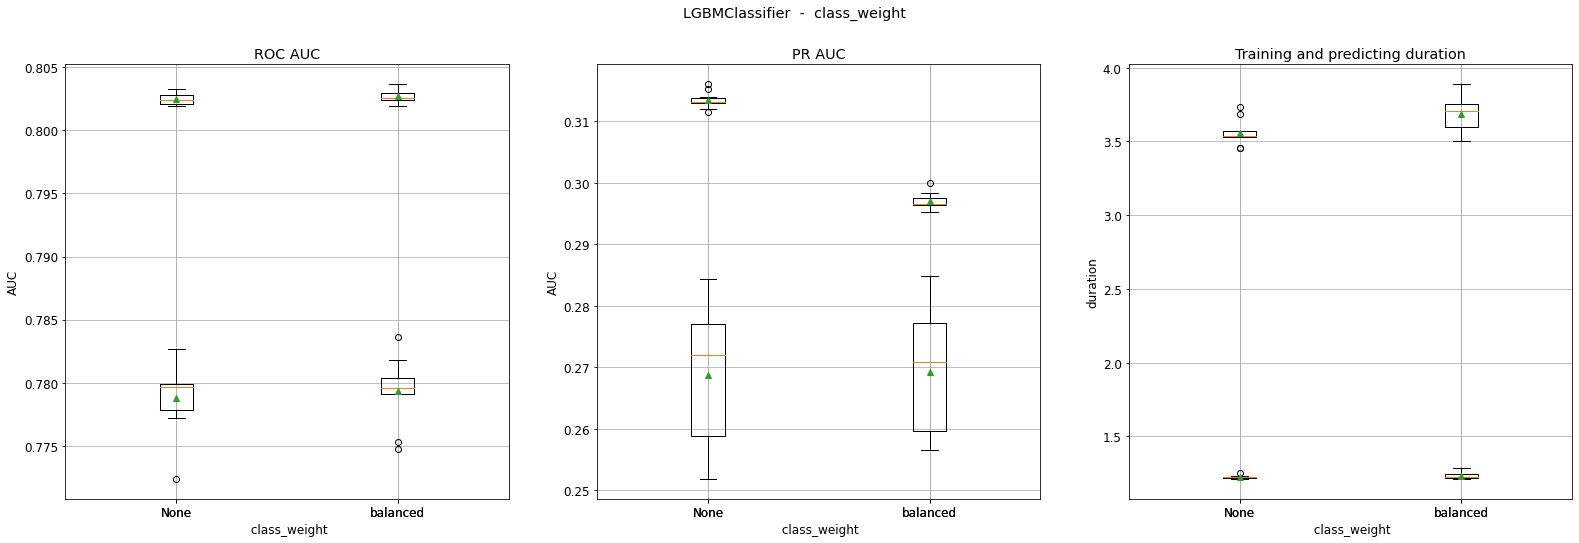

In [25]:
results_tmp = []

model = LGBMClassifier(max_depth=7, learning_rate=0.1, num_leaves=10, class_weight=None, subsample_for_bin=25000, n_estimators=150, n_jobs=-1)
title = 'LGBMClassifier | class_weight=None'
res = evaluate(model=model, title=title)
results_tmp.append(res)

model = LGBMClassifier(max_depth=7, learning_rate=0.1, num_leaves=10, class_weight='balanced', subsample_for_bin=25000, n_estimators=150, n_jobs=-1)
title = 'LGBMClassifier | class_weight=balanced'
res = evaluate(model=model, title=title)
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

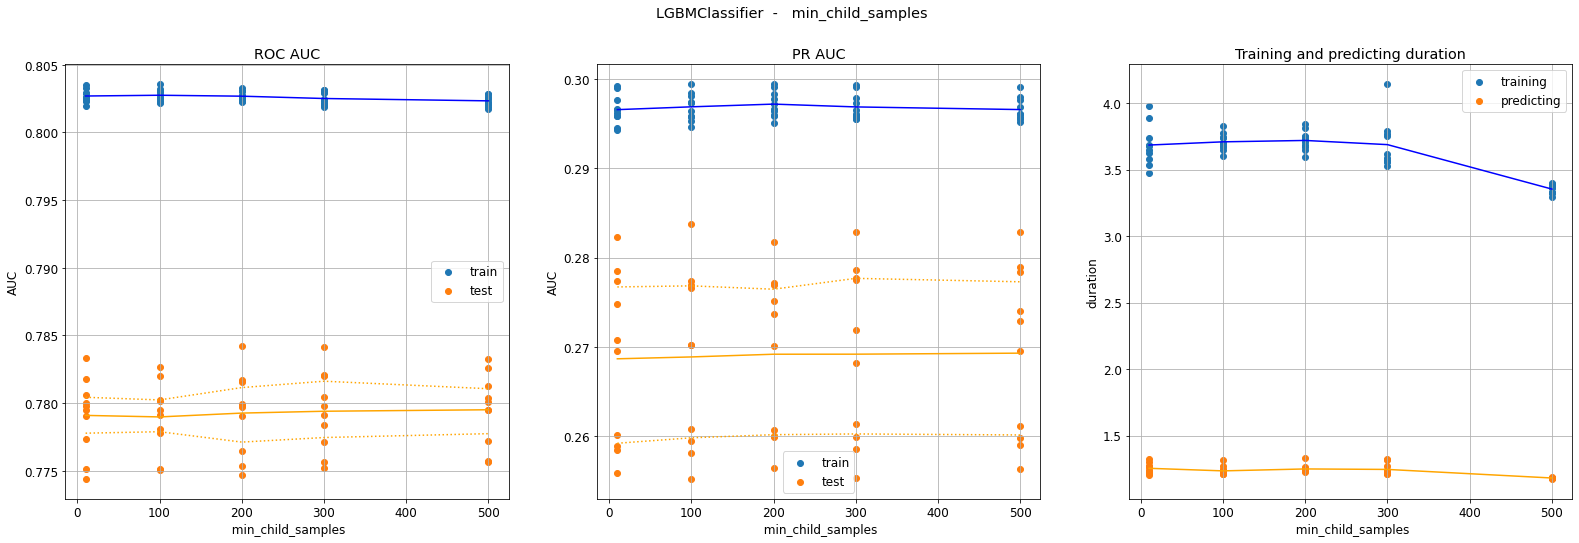

In [30]:
results_tmp = []
lst = [10, 100, 200, 300, 500]
for param_value in lst:
    model = LGBMClassifier(max_depth=7, learning_rate=0.1, num_leaves=10, class_weight='balanced', min_child_samples=param_value, subsample_for_bin=25000, n_estimators=150, n_jobs=-1)
    title = 'LGBMClassifier |  min_child_samples = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)


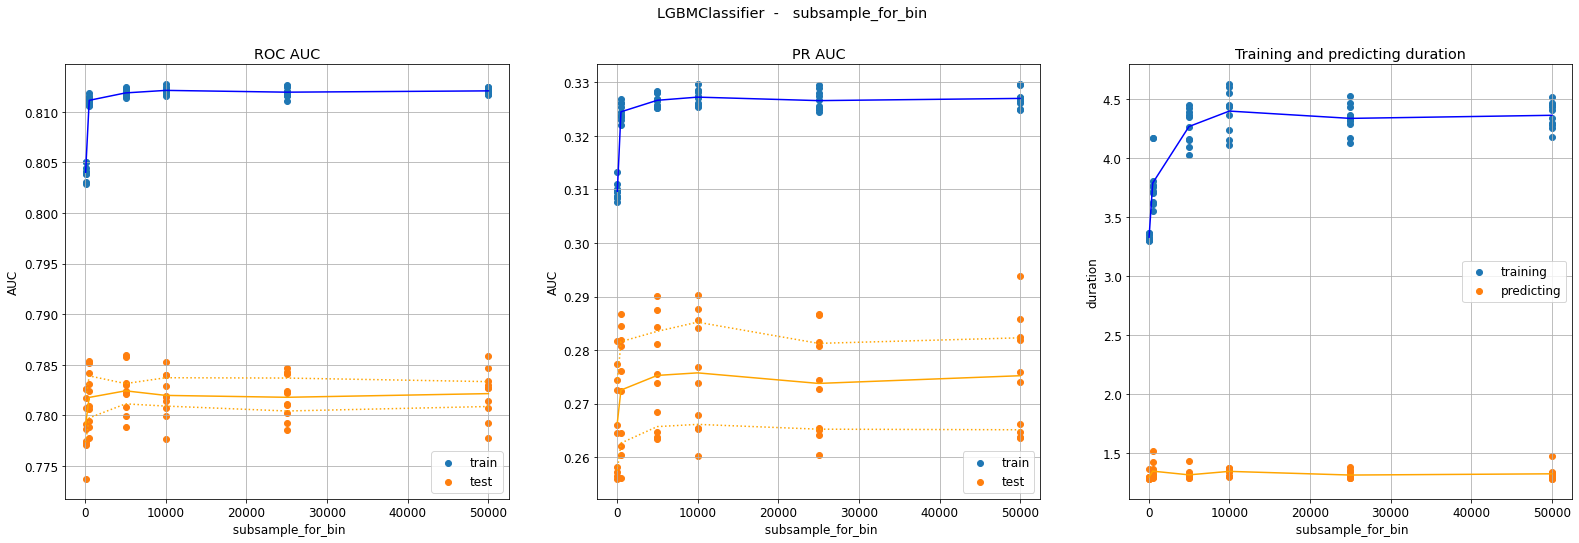

In [33]:
results_tmp = []
lst = [50, 500, 5000, 10000, 25000, 50000]
for param_value in lst:
    model = LGBMClassifier(max_depth=7, learning_rate=0.125, num_leaves=8, min_child_samples=500, subsample_for_bin=param_value, n_estimators=250, n_jobs=-1)
    title = 'LGBMClassifier |  subsample_for_bin = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)


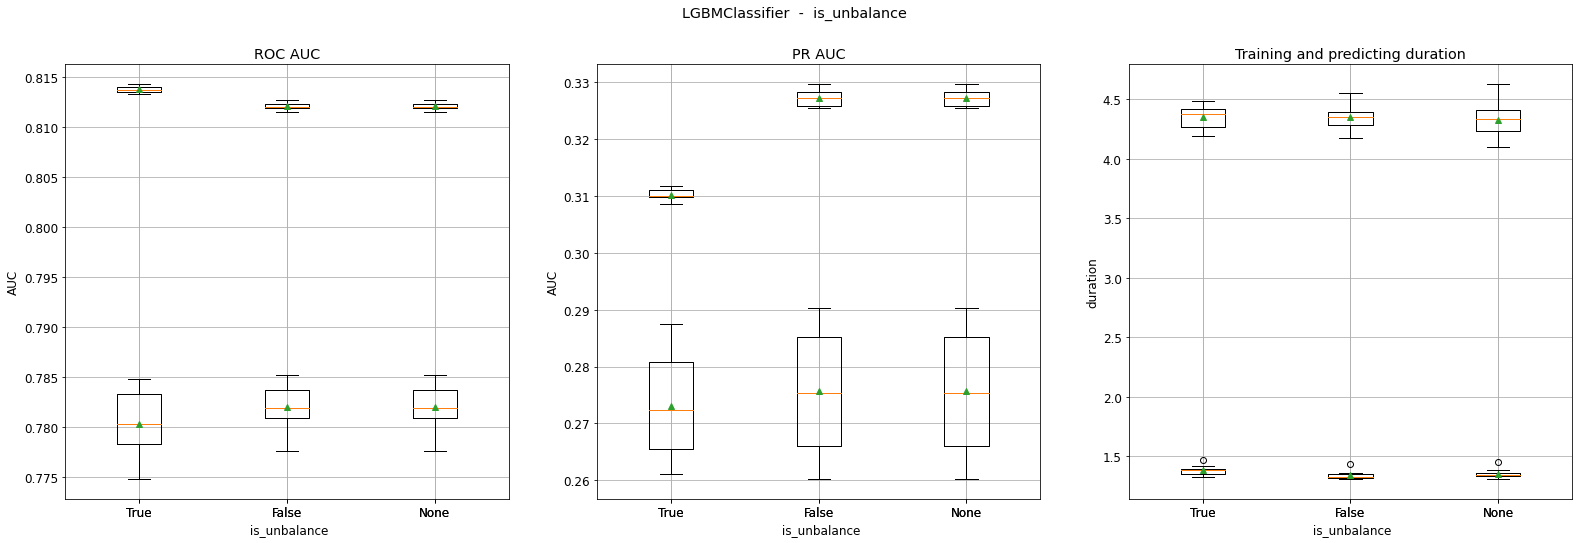

In [171]:
results_tmp = []

model = LGBMClassifier(max_depth=7, learning_rate=0.125, num_leaves=8, min_child_samples=500, subsample_for_bin=10000, is_unbalance=True, n_estimators=250, n_jobs=-1)
title = 'LGBMClassifier | is_unbalance=True'
res = evaluate(model=model, title=title)
results_tmp.append(res)

model = LGBMClassifier(max_depth=7, learning_rate=0.125, num_leaves=8, min_child_samples=500, subsample_for_bin=10000, is_unbalance=False, n_estimators=250, n_jobs=-1)
title = 'LGBMClassifier | is_unbalance=False'
res = evaluate(model=model, title=title)
results_tmp.append(res)

model = LGBMClassifier(max_depth=7, learning_rate=0.125, num_leaves=8, min_child_samples=500, subsample_for_bin=10000, n_estimators=250, n_jobs=-1)
title = 'LGBMClassifier | is_unbalance=None'
res = evaluate(model=model, title=title)
results_tmp.append(res)


displayPlotParamOptimBox(results_tmp)

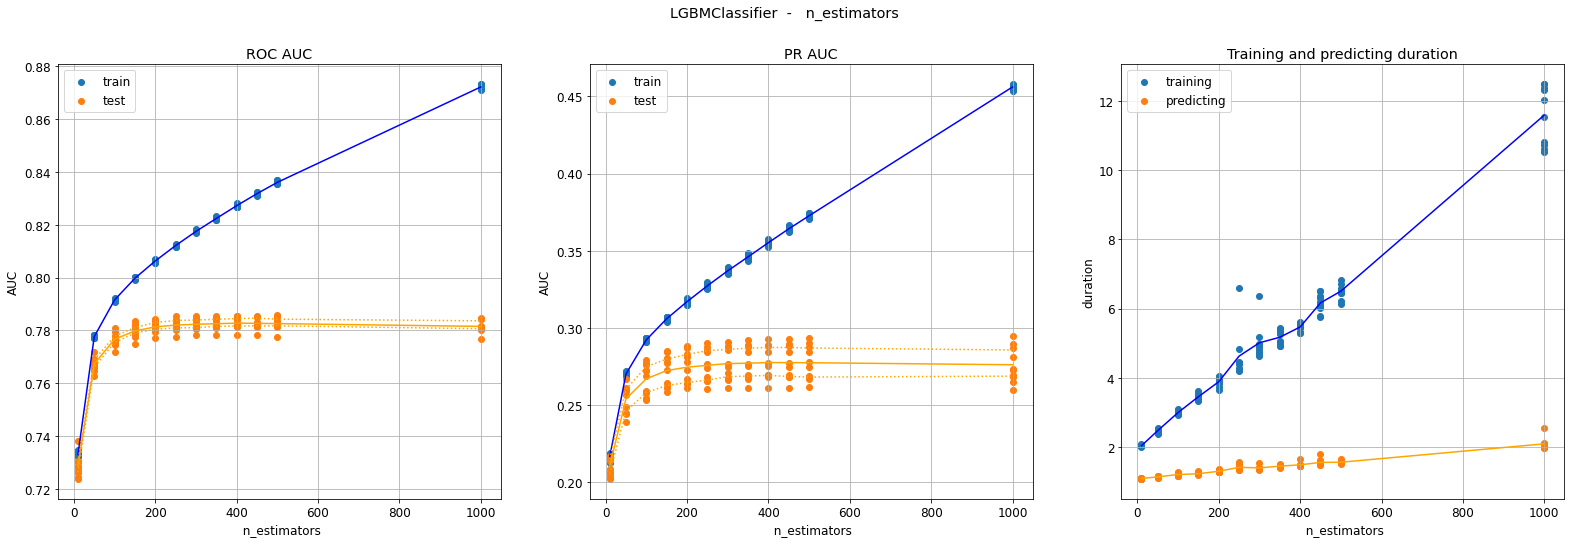

In [172]:
results_tmp = []
lst = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000]
for param_value in lst:
    model = LGBMClassifier(max_depth=7, learning_rate=0.125, num_leaves=8, min_child_samples=500, subsample_for_bin=10000, n_estimators=param_value, n_jobs=-1)
    title = 'LGBMClassifier |  n_estimators = ' + str(param_value)
    res = evaluate(model=model, title=title)
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

# Evaluation après optimisation des paramètres

In [13]:
model = LGBMClassifier(max_depth=7, learning_rate=0.125, num_leaves=8, min_child_samples=500, subsample_for_bin=10000, n_estimators=350, n_jobs=-1)
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='Optim param', display_plot=False, target='TARGET', identifier='SK_ID_CURR')
results.append(res)
pd.concat(results).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

,title,roc_auc_train,roc_auc_test,pr_auc_train,pr_auc_test,time_train,time_pred,nb_feat,nb_train,timestamp
0,Default data,0.793640,0.770315,0.303131,0.259309,3.712426,1.561177,203.0,135073.333333,1.625816e+09
1,Worked data,0.800595,0.775974,0.311465,0.265771,4.056469,1.657060,229.0,135073.333333,1.625816e+09
2,Data importance > 0,0.800239,0.776526,0.311545,0.266487,2.671976,0.921972,122.0,135073.333333,1.625816e+09
3,Optim param,0.832327,0.780498,0.366028,0.271882,3.882219,1.029855,122.0,135073.333333,1.625816e+09


# Optimisation des imputers

## Optimisation des defaultImputer

### Variables catégorielles

In [40]:
results_tmp = []

defaultCatImputer = SimpleImputer(strategy='constant', fill_value='missing')
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='defaultCatImputer = missing', display_plot=False, target='TARGET', identifier='SK_ID_CURR',defaultCatImputer=defaultCatImputer)
results_tmp.append(res)

defaultCatImputer = SimpleImputer(strategy='most_frequent')
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='defaultCatImputer = most_frequent', display_plot=False, target='TARGET', identifier='SK_ID_CURR',defaultCatImputer=defaultCatImputer)
results_tmp.append(res)

pd.concat(results_tmp).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

,title,roc_auc_train,roc_auc_test,pr_auc_train,pr_auc_test,time_train,time_pred,nb_feat,nb_train,timestamp
0,defaultCatImputer = missing,0.838363,0.780482,0.378072,0.271850,6.047801,1.261793,122.0,135073.333333,1.625748e+09
1,defaultCatImputer = most_frequent,0.838092,0.780705,0.377436,0.272469,6.116110,1.293123,122.0,135073.333333,1.625748e+09


### Variables ordinales

In [41]:
results_tmp = []

defaultCatImputer = SimpleImputer(strategy='most_frequent')
defaultOrdImputer = SimpleImputer(strategy='most_frequent')
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='defaultOrdImputer = most_frequent', display_plot=False, target='TARGET', identifier='SK_ID_CURR',defaultCatImputer=defaultCatImputer,defaultOrdImputer=defaultOrdImputer)
results_tmp.append(res)

defaultCatImputer = SimpleImputer(strategy='most_frequent')
defaultOrdImputer = SimpleImputer(strategy='mean')
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='defaultOrdImputer = mean', display_plot=False, target='TARGET', identifier='SK_ID_CURR',defaultCatImputer=defaultCatImputer,defaultOrdImputer=defaultOrdImputer)
results_tmp.append(res)

defaultCatImputer = SimpleImputer(strategy='most_frequent')
defaultOrdImputer = SimpleImputer(strategy='constant', fill_value=-1)
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='defaultOrdImputer = -1', display_plot=False, target='TARGET', identifier='SK_ID_CURR',defaultCatImputer=defaultCatImputer,defaultOrdImputer=defaultOrdImputer)
results_tmp.append(res)

defaultCatImputer = SimpleImputer(strategy='most_frequent')
defaultOrdImputer = IterativeImputer()
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='defaultOrdImputer = iterative', display_plot=False, target='TARGET', identifier='SK_ID_CURR',defaultCatImputer=defaultCatImputer,defaultOrdImputer=defaultOrdImputer)
results_tmp.append(res)

pd.concat(results_tmp).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

,title,roc_auc_train,roc_auc_test,pr_auc_train,pr_auc_test,time_train,time_pred,nb_feat,nb_train,timestamp
0,defaultOrdImputer = most_frequent,0.838092,0.780705,0.377436,0.272469,4.021208,1.137225,122.0,135073.333333,1.625751e+09
1,defaultOrdImputer = mean,0.838306,0.780339,0.377712,0.271886,3.866953,1.080626,122.0,135073.333333,1.625751e+09
2,defaultOrdImputer = -1,0.838055,0.780808,0.377749,0.271972,3.942443,1.082754,122.0,135073.333333,1.625751e+09
3,defaultOrdImputer = iterative,0.838702,0.780450,0.377791,0.272768,5.340295,1.169486,122.0,135073.333333,1.625751e+09


### Variables continues

In [42]:
results_tmp = []

defaultCatImputer = SimpleImputer(strategy='most_frequent')
defaultOrdImputer = SimpleImputer(strategy='most_frequent')
defaultNumImputer = SimpleImputer(strategy='constant', fill_value=-1)
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='defaultNumImputer = -1', display_plot=False, target='TARGET', identifier='SK_ID_CURR',defaultCatImputer=defaultCatImputer,defaultOrdImputer=defaultOrdImputer,defaultNumImputer=defaultNumImputer)
results_tmp.append(res)

defaultCatImputer = SimpleImputer(strategy='most_frequent')
defaultOrdImputer = SimpleImputer(strategy='most_frequent')
defaultNumImputer = SimpleImputer(strategy='mean')
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='defaultNumImputer = mean', display_plot=False, target='TARGET', identifier='SK_ID_CURR',defaultCatImputer=defaultCatImputer,defaultOrdImputer=defaultOrdImputer,defaultNumImputer=defaultNumImputer)
results_tmp.append(res)

defaultCatImputer = SimpleImputer(strategy='most_frequent')
defaultOrdImputer = SimpleImputer(strategy='most_frequent')
defaultNumImputer = IterativeImputer()
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='defaultNumImputer = iterative', display_plot=False, target='TARGET', identifier='SK_ID_CURR',defaultCatImputer=defaultCatImputer,defaultOrdImputer=defaultOrdImputer,defaultNumImputer=defaultNumImputer)
results_tmp.append(res)

pd.concat(results_tmp).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

,title,roc_auc_train,roc_auc_test,pr_auc_train,pr_auc_test,time_train,time_pred,nb_feat,nb_train,timestamp
0,defaultNumImputer = -1,0.838350,0.780483,0.376171,0.270161,4.447060,1.124694,122.0,135073.333333,1.625751e+09
1,defaultNumImputer = mean,0.838092,0.780705,0.377436,0.272469,6.393942,1.255963,122.0,135073.333333,1.625751e+09
2,defaultNumImputer = iterative,0.839934,0.780692,0.379876,0.271125,49.272060,1.980312,122.0,135073.333333,1.625752e+09


## Optimisation transformers

In [15]:
categorical_col = []
ordinal_col = []
numerical_col = []

for col in dfApplication.columns:
    if col not in ['TARGET','SK_ID_CURR']:
        if dfApplication[col].dtypes == 'object':
            categorical_col.append(col)
        else:
            if dfApplication[col].nunique() < 100:
                ordinal_col.append(col)
            else:
                numerical_col.append(col)

In [17]:
# test transform
cols = numerical_col
cols = [col for col in cols if col in list(imp.head(40).feature)]

transformMetrics = []
cv = 3

transformMetrics.append(evaluateRocPrCurves(dfApplication, 
                        target='TARGET', 
                        identifier='SK_ID_CURR', 
                        model=model,
                        defaultCatImputer = SimpleImputer(strategy='most_frequent'),
                        defaultOrdImputer = SimpleImputer(strategy='most_frequent'),
                        defaultNumImputer = SimpleImputer(strategy='mean'),
                        display_plot=False,
                        title_plot = 'Initial',
                        cv=cv))


listLabel = ['PowerTransformer', 'QuantileTransformer', 'KBinsDiscretizer10', 'KBinsDiscretizer50', 'KBinsDiscretizer100'] 

j = 0
for col in cols:

    j += 1
    print(j)
    print(datetime.datetime.now())

    for i in np.arange(len(listLabel)):


        print(col + ' - ' + listLabel[i])        

        if listLabel[i] == 'PowerTransformer':
            power = [col]
            quantile=[]
            kbins10=[]
            kbins50=[]
            kbins100=[]

        if listLabel[i] == 'QuantileTransformer':
            power = []
            quantile=[col]
            kbins10=[]
            kbins50=[]
            kbins100=[]
        if listLabel[i] == 'KBinsDiscretizer10':
            power = []
            quantile=[]
            kbins10=[col]
            kbins50=[]
            kbins100=[]
        if listLabel[i] == 'KBinsDiscretizer50':
            power = []
            quantile=[]
            kbins10=[]
            kbins50=[col]
            kbins100=[]
        if listLabel[i] == 'KBinsDiscretizer100':
            power = []
            quantile=[]
            kbins10=[]
            kbins50=[]
            kbins100=[col]
            
        transformMetrics.append(evaluateRocPrCurves(dfApplication, 
                                    target='TARGET', 
                                    identifier='SK_ID_CURR', 
                                    model=model,
                                    defaultCatImputer = SimpleImputer(strategy='most_frequent'),
                                    defaultOrdImputer = SimpleImputer(strategy='most_frequent'),
                                    defaultNumImputer = SimpleImputer(strategy='mean'),                                                    
                                    power=power, quantile=quantile, kbins10=kbins10, kbins50=kbins50, kbins100=kbins100,
                                    display_plot=False,
                                    title_plot = col + '|' + listLabel[i],
                                    cv=cv))

        dump(transformMetrics, open('transformMetrics.pkl','wb'))



1
2021-07-09 09:29:05.549169
AMT_CREDIT - PowerTransformer
AMT_CREDIT - QuantileTransformer
AMT_CREDIT - KBinsDiscretizer10
AMT_CREDIT - KBinsDiscretizer50
AMT_CREDIT - KBinsDiscretizer100
2
2021-07-09 09:31:10.579242
AMT_ANNUITY - PowerTransformer
AMT_ANNUITY - QuantileTransformer
AMT_ANNUITY - KBinsDiscretizer10
AMT_ANNUITY - KBinsDiscretizer50
AMT_ANNUITY - KBinsDiscretizer100
3
2021-07-09 09:33:14.167124
AMT_GOODS_PRICE - PowerTransformer
AMT_GOODS_PRICE - QuantileTransformer
AMT_GOODS_PRICE - KBinsDiscretizer10
AMT_GOODS_PRICE - KBinsDiscretizer50
AMT_GOODS_PRICE - KBinsDiscretizer100
4
2021-07-09 09:35:22.882624
DAYS_BIRTH - PowerTransformer
DAYS_BIRTH - QuantileTransformer
DAYS_BIRTH - KBinsDiscretizer10
DAYS_BIRTH - KBinsDiscretizer50
DAYS_BIRTH - KBinsDiscretizer100
5
2021-07-09 09:37:16.563455
DAYS_EMPLOYED - PowerTransformer
DAYS_EMPLOYED - QuantileTransformer
DAYS_EMPLOYED - KBinsDiscretizer10
DAYS_EMPLOYED - KBinsDiscretizer50
DAYS_EMPLOYED - KBinsDiscretizer100
6
2021-07-

POSCASH_CNT_INSTALMENT_FUTURE - KBinsDiscretizer100


In [26]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
tmp = pd.concat(transformMetrics).groupby('title').mean().reset_index().sort_values('timestamp')
#tmp = tmp[(tmp.title.str.find('KBinsDiscretizer 10') < 0) & (tmp.title.str.find('KBinsDiscretizer 100') < 0)]

roc_auc_test = tmp[tmp.title == 'Initial'].roc_auc_test.values[0]
pr_auc_test = tmp[tmp.title == 'Initial'].pr_auc_test.values[0]

tmp['gain'] = tmp.apply(lambda x: 1000 * (x.roc_auc_test + x.pr_auc_test - roc_auc_test - pr_auc_test), axis=1)
tmp = tmp[tmp.gain > 0]
tmp['feature'] = tmp.apply(lambda x: x.title.split('|')[0].strip(), axis=1)
tmp['transformer'] = tmp.apply(lambda x: x.title.split('|')[1].strip(), axis=1)
del tmp['title']
tmp = tmp[['feature','transformer','gain']]
tmp = tmp.merge(tmp.groupby(['feature']).agg({'gain':'max'}).reset_index(drop=False), left_on=['feature','gain'], right_on=['feature','gain'])
tmp = tmp.merge(tmp.groupby(['feature','gain']).agg({'transformer':'min'}).reset_index(drop=False), left_on=['feature','gain','transformer'], right_on=['feature','gain','transformer'])
tmp.sort_values('gain', ascending=False).reset_index(drop=True)

,feature,transformer,gain
0,PREV_AMT_DOWN_PAYMENT,KBinsDiscretizer100,1.78762
1,CREDCARD_MONTHS_BALANCE,KBinsDiscretizer50,1.51222
2,CREDCARD_CNT_DRAWINGS_ATM_CURRENT,KBinsDiscretizer10,1.25640
3,POSCASH_CNT_INSTALMENT_FUTURE,KBinsDiscretizer100,1.18519
4,DAYS_BIRTH,KBinsDiscretizer50,1.15854
5,POSCASH_CNT_INSTALMENT_FUTURE_LEFT,KBinsDiscretizer100,1.14680
6,DAYS_ID_PUBLISH,KBinsDiscretizer10,1.10696
7,PREV_NAME_YIELD_GROUP_ORD,KBinsDiscretizer10,1.03547
8,PREV_AMT_CREDIT_ACTIVE,PowerTransformer,0.90010
9,BURO_AMT_CREDIT_ACTIVE,PowerTransformer,0.82058


In [27]:
power = list(tmp[(tmp.transformer=='PowerTransformer') & (tmp.gain > 0.1)].feature)
quantile = list(tmp[(tmp.transformer=='QuantileTransformer') & (tmp.gain > 0.1)].feature)
kbins10 = list(tmp[(tmp.transformer=='KBinsDiscretizer10') & (tmp.gain > 0.1)].feature)
kbins50 = list(tmp[(tmp.transformer=='KBinsDiscretizer50') & (tmp.gain > 0.1)].feature)
kbins100 = list(tmp[(tmp.transformer=='KBinsDiscretizer100') & (tmp.gain > 0.1)].feature)

In [28]:
dictDataTransform = { 'power':power,
                      'quantile':quantile,
                      'kbins10':kbins10,
                      'kbins50':kbins50,
                      'kbins100':kbins100}
from pickle import dump
dump(dictDataTransform,open('dictDataTransform.pkl','wb'))

In [30]:
model = LGBMClassifier(max_depth=7, learning_rate=0.125, num_leaves=8, min_child_samples=500, subsample_for_bin=10000, n_estimators=350, n_jobs=-1)
res = evaluateRocPrCurves(dfApplication, model=model, power=power, quantile=quantile, kbins10=kbins10, kbins50=kbins50, kbins100=kbins100, title_plot='Optim transformer', display_plot=False, target='TARGET', identifier='SK_ID_CURR')
results.append(res)
pd.concat(results).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

,title,roc_auc_train,roc_auc_test,pr_auc_train,pr_auc_test,time_train,time_pred,nb_feat,nb_train,timestamp
0,Default data,0.79364,0.77032,0.30313,0.25931,3.71243,1.56118,203.00000,135073.33333,1625815577.00000
1,Worked data,0.80059,0.77597,0.31146,0.26577,4.05647,1.65706,229.00000,135073.33333,1625815607.00000
2,Data importance > 0,0.80024,0.77653,0.31154,0.26649,2.67198,0.92197,122.00000,135073.33333,1625815649.00000
3,Optim param,0.83233,0.78050,0.36603,0.27188,3.88222,1.02986,122.00000,135073.33333,1625815672.00000
4,Optim transformer,0.82999,0.78059,0.36350,0.27287,3.45988,1.05817,122.00000,135073.33333,1625819809.00000


## Optimisation du scaler

### Default scaler

In [31]:
results_tmp = []

defaultScaler = MinMaxScaler()
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='MinMax', display_plot=False, target='TARGET', identifier='SK_ID_CURR', power=power, quantile=quantile, kbins10=kbins10, kbins50=kbins50, kbins100=kbins100, defaultScaler=defaultScaler)
results_tmp.append(res)

defaultScaler = StandardScaler()
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='Standard', display_plot=False, target='TARGET', identifier='SK_ID_CURR', power=power, quantile=quantile, kbins10=kbins10, kbins50=kbins50, kbins100=kbins100, defaultScaler=defaultScaler)
results_tmp.append(res)

defaultScaler = RobustScaler()
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='Robust', display_plot=False, target='TARGET', identifier='SK_ID_CURR', power=power, quantile=quantile, kbins10=kbins10, kbins50=kbins50, kbins100=kbins100, defaultScaler=defaultScaler)
results_tmp.append(res)

pd.concat(results_tmp).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

,title,roc_auc_train,roc_auc_test,pr_auc_train,pr_auc_test,time_train,time_pred,nb_feat,nb_train,timestamp
0,MinMax,0.82997,0.78094,0.36336,0.27293,4.85990,1.19936,122.00000,135073.33333,1625819883.00000
1,Standard,0.82978,0.78042,0.36172,0.27178,3.79196,1.07607,122.00000,135073.33333,1625819906.00000
2,Robust,0.83032,0.78052,0.36338,0.27250,3.78944,1.10483,122.00000,135073.33333,1625819928.00000


### Specific scaler

In [33]:
# test transform
cols = numerical_col
cols = [col for col in cols if col in list(imp.head(40).feature)]

transformMetrics = []
cv = 3

transformMetrics.append(evaluateRocPrCurves(dfApplication, 
                        target='TARGET', 
                        identifier='SK_ID_CURR', 
                        model=model,
                        defaultCatImputer = SimpleImputer(strategy='most_frequent'),
                        defaultOrdImputer = SimpleImputer(strategy='most_frequent'),
                        defaultNumImputer = SimpleImputer(strategy='mean'),                                            
                        power=power, quantile=quantile, kbins10=kbins10, kbins50=kbins50, kbins100=kbins100,
                        defaultScaler=MinMaxScaler(),
                        display_plot=False,
                        title_plot = 'Initial',
                        cv=cv))


listLabel = ['StandardScaler', 'MinMaxScaler', 'RobustScaler'] 

j = 0
for col in cols:

    j += 1
    print(j)
    print(datetime.datetime.now())

    for i in np.arange(len(listLabel)):

        print(col + ' - ' + listLabel[i])        

        if listLabel[i] == 'StandardScaler':
            standard = [col]
            minmax=[]
            robust=[]

        if listLabel[i] == 'MinMaxScaler':
            standard = []
            minmax=[col]
            robust=[]
            
        if listLabel[i] == 'RobustScaler':
            standard = []
            minmax=[]
            robust=[col]            
            
        transformMetrics.append(evaluateRocPrCurves(dfApplication, 
                                    target='TARGET', 
                                    identifier='SK_ID_CURR', 
                                    model=model,
                                    defaultCatImputer = SimpleImputer(strategy='most_frequent'),
                                    defaultOrdImputer = SimpleImputer(strategy='most_frequent'),
                                    defaultNumImputer = SimpleImputer(strategy='mean'),                                                    
                                    power=power, quantile=quantile, kbins10=kbins10, kbins50=kbins50, kbins100=kbins100,
                                    defaultScaler=MinMaxScaler(),
                                    minmax=minmax, standard=standard, robust=robust,
                                    display_plot=False,
                                    title_plot = col + '|' + listLabel[i],
                                    cv=cv))

        dump(transformMetrics, open('transformMetrics.pkl','wb'))



1
2021-07-09 10:44:19.786994
AMT_CREDIT - StandardScaler
AMT_CREDIT - MinMaxScaler
AMT_CREDIT - RobustScaler
2
2021-07-09 10:45:24.108244
AMT_ANNUITY - StandardScaler
AMT_ANNUITY - MinMaxScaler
AMT_ANNUITY - RobustScaler
3
2021-07-09 10:46:29.096101
AMT_GOODS_PRICE - StandardScaler
AMT_GOODS_PRICE - MinMaxScaler
AMT_GOODS_PRICE - RobustScaler
4
2021-07-09 10:47:34.670075
DAYS_BIRTH - StandardScaler
DAYS_BIRTH - MinMaxScaler
DAYS_BIRTH - RobustScaler
5
2021-07-09 10:48:53.187157
DAYS_EMPLOYED - StandardScaler
DAYS_EMPLOYED - MinMaxScaler
DAYS_EMPLOYED - RobustScaler
6
2021-07-09 10:50:17.646961
DAYS_ID_PUBLISH - StandardScaler
DAYS_ID_PUBLISH - MinMaxScaler
DAYS_ID_PUBLISH - RobustScaler
7
2021-07-09 10:51:23.855322
EXT_SOURCE_1 - StandardScaler
EXT_SOURCE_1 - MinMaxScaler
EXT_SOURCE_1 - RobustScaler
8
2021-07-09 10:52:38.097858
EXT_SOURCE_2 - StandardScaler
EXT_SOURCE_2 - MinMaxScaler
EXT_SOURCE_2 - RobustScaler
9
2021-07-09 10:53:59.071104
EXT_SOURCE_3 - StandardScaler
EXT_SOURCE_3 - 

In [38]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
tmp = pd.concat(transformMetrics).groupby('title').mean().reset_index().sort_values('timestamp')
#tmp = tmp[(tmp.title.str.find('KBinsDiscretizer 10') < 0) & (tmp.title.str.find('KBinsDiscretizer 100') < 0)]

roc_auc_test = tmp[tmp.title == 'Initial'].roc_auc_test.values[0]
pr_auc_test = tmp[tmp.title == 'Initial'].pr_auc_test.values[0]

tmp['gain'] = tmp.apply(lambda x: 1000 * (x.roc_auc_test + x.pr_auc_test - roc_auc_test - pr_auc_test), axis=1)
tmp = tmp[tmp.gain > 0.1]
tmp['feature'] = tmp.apply(lambda x: x.title.split('|')[0].strip(), axis=1)
tmp['transformer'] = tmp.apply(lambda x: x.title.split('|')[1].strip(), axis=1)
del tmp['title']
tmp = tmp[['feature','transformer','gain']]
tmp = tmp.merge(tmp.groupby(['feature']).agg({'gain':'max'}).reset_index(drop=False), left_on=['feature','gain'], right_on=['feature','gain'])
tmp = tmp.merge(tmp.groupby(['feature','gain']).agg({'transformer':'min'}).reset_index(drop=False), left_on=['feature','gain','transformer'], right_on=['feature','gain','transformer'])
tmp.sort_values('gain', ascending=False).reset_index(drop=True)

,feature,transformer,gain
0,DAYS_EMPLOYED,StandardScaler,2.32217
1,PREV_AMT_CREDIT_ACTIVE,RobustScaler,1.95225
2,PREVBURO_LAST_DAYS_DECISION,MinMaxScaler,1.76976
3,AMT_ANNUITY,RobustScaler,1.48796
4,PREV_NAME_YIELD_GROUP_ORD,StandardScaler,1.45693
5,PREV_AMT_ANNUITY,RobustScaler,1.45013
6,EXT_SOURCE_2,RobustScaler,1.26112
7,PREVBURO_DAYS_DIFF,StandardScaler,1.26080
8,BURO_AMT_CREDIT_ACTIVE,RobustScaler,1.22991
9,BURO_AMT_CREDIT_SUM_DEBT,StandardScaler,1.16463


In [39]:
minmax = list(tmp[(tmp.transformer=='MinMaxScaler') & (tmp.gain > 0.1)].feature)
standard = list(tmp[(tmp.transformer=='StandardScaler') & (tmp.gain > 0.1)].feature)
robust = list(tmp[(tmp.transformer=='RobustScaler') & (tmp.gain > 0.1)].feature)

In [40]:
model = LGBMClassifier(max_depth=7, learning_rate=0.125, num_leaves=8, min_child_samples=500, subsample_for_bin=10000, n_estimators=350, n_jobs=-1)
res = evaluateRocPrCurves(dfApplication, model=model, power=power, quantile=quantile, kbins10=kbins10, kbins50=kbins50, kbins100=kbins100, minmax=minmax, standard=standard, robust=robust, title_plot='Optim scaler', display_plot=False, target='TARGET', identifier='SK_ID_CURR')
results.append(res)
pd.concat(results).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

,title,roc_auc_train,roc_auc_test,pr_auc_train,pr_auc_test,time_train,time_pred,nb_feat,nb_train,timestamp
0,Default data,0.79364,0.77032,0.30313,0.25931,3.71243,1.56118,203.00000,135073.33333,1625815577.00000
1,Worked data,0.80059,0.77597,0.31146,0.26577,4.05647,1.65706,229.00000,135073.33333,1625815607.00000
2,Data importance > 0,0.80024,0.77653,0.31154,0.26649,2.67198,0.92197,122.00000,135073.33333,1625815649.00000
3,Optim param,0.83233,0.78050,0.36603,0.27188,3.88222,1.02986,122.00000,135073.33333,1625815672.00000
4,Optim transformer,0.82999,0.78059,0.36350,0.27287,3.45988,1.05817,122.00000,135073.33333,1625819809.00000
5,Optim scaler,0.83012,0.78074,0.36353,0.27277,3.57935,1.08200,122.00000,135073.33333,1625822990.00000


## Optimisation encoder

In [46]:
# test transform
cols = categorical_col

transformMetrics = []
cv = 3

transformMetrics.append(evaluateRocPrCurves(dfApplication, 
                        target='TARGET', 
                        identifier='SK_ID_CURR', 
                        model=model,
                        defaultCatImputer = SimpleImputer(strategy='most_frequent'),
                        defaultOrdImputer = SimpleImputer(strategy='most_frequent'),
                        defaultNumImputer = SimpleImputer(strategy='mean'),                                            
                        power=power, quantile=quantile, kbins10=kbins10, kbins50=kbins50, kbins100=kbins100,
                        defaultScaler=MinMaxScaler(),
                        minmax=minmax, standard=standard, robust=robust,
                        display_plot=False,
                        title_plot = 'Initial',
                        cv=cv))


listLabel = ['Ordinal', 'OneHot'] 

j = 0
for col in cols:

    j += 1
    print(j)
    print(datetime.datetime.now())

    for i in np.arange(len(listLabel)):

        print(col + ' - ' + listLabel[i])        

        if listLabel[i] == 'Ordinal':
            ordinal = [col]
            onehot=[]

        if listLabel[i] == 'OneHot':
            ordinal = []
            onehot=[col]
                     
            
        transformMetrics.append(evaluateRocPrCurves(dfApplication, 
                                    target='TARGET', 
                                    identifier='SK_ID_CURR', 
                                    model=model,
                                    defaultCatImputer = SimpleImputer(strategy='most_frequent'),
                                    defaultOrdImputer = SimpleImputer(strategy='most_frequent'),
                                    defaultNumImputer = SimpleImputer(strategy='mean'),                                                    
                                    power=power, quantile=quantile, kbins10=kbins10, kbins50=kbins50, kbins100=kbins100,
                                    defaultScaler=MinMaxScaler(),
                                    minmax=minmax, standard=standard, robust=robust,
                                    ordinal=ordinal, onehot=onehot,
                                    display_plot=False,
                                    title_plot = col + '|' + listLabel[i],
                                    cv=cv))

        dump(transformMetrics, open('transformMetrics.pkl','wb'))



1
2021-07-09 11:41:35.607044
NAME_CONTRACT_TYPE - Ordinal
NAME_CONTRACT_TYPE - OneHot
2
2021-07-09 11:42:19.411314
CODE_GENDER - Ordinal
CODE_GENDER - OneHot
3
2021-07-09 11:43:07.363491
FLAG_OWN_CAR - Ordinal
FLAG_OWN_CAR - OneHot
4
2021-07-09 11:43:52.821671
NAME_INCOME_TYPE - Ordinal
NAME_INCOME_TYPE - OneHot
5
2021-07-09 11:44:38.703436
NAME_EDUCATION_TYPE - Ordinal
NAME_EDUCATION_TYPE - OneHot
6
2021-07-09 11:45:23.585811
NAME_FAMILY_STATUS - Ordinal
NAME_FAMILY_STATUS - OneHot
7
2021-07-09 11:46:08.837142
NAME_HOUSING_TYPE - Ordinal
NAME_HOUSING_TYPE - OneHot
8
2021-07-09 11:46:53.843300
OCCUPATION_TYPE - Ordinal
OCCUPATION_TYPE - OneHot
9
2021-07-09 11:47:39.342719
ORGANIZATION_TYPE - Ordinal
ORGANIZATION_TYPE - OneHot
10
2021-07-09 11:48:25.472167
WALLSMATERIAL_MODE - Ordinal
WALLSMATERIAL_MODE - OneHot
11
2021-07-09 11:49:11.409595
PREV_CODE_REJECT_REASON - Ordinal
PREV_CODE_REJECT_REASON - OneHot
12
2021-07-09 11:49:57.235963
PREV_NAME_TYPE_SUITE - Ordinal
PREV_NAME_TYPE_SUIT

In [47]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
tmp = pd.concat(transformMetrics).groupby('title').mean().reset_index().sort_values('timestamp')
#tmp = tmp[(tmp.title.str.find('KBinsDiscretizer 10') < 0) & (tmp.title.str.find('KBinsDiscretizer 100') < 0)]

roc_auc_test = tmp[tmp.title == 'Initial'].roc_auc_test.values[0]
pr_auc_test = tmp[tmp.title == 'Initial'].pr_auc_test.values[0]

tmp['gain'] = tmp.apply(lambda x: 1000 * (x.roc_auc_test + x.pr_auc_test - roc_auc_test - pr_auc_test), axis=1)
tmp = tmp[tmp.gain > 0.1]
tmp['feature'] = tmp.apply(lambda x: x.title.split('|')[0].strip(), axis=1)
tmp['transformer'] = tmp.apply(lambda x: x.title.split('|')[1].strip(), axis=1)
del tmp['title']
tmp = tmp[['feature','transformer','gain']]
tmp = tmp.merge(tmp.groupby(['feature']).agg({'gain':'max'}).reset_index(drop=False), left_on=['feature','gain'], right_on=['feature','gain'])
tmp = tmp.merge(tmp.groupby(['feature','gain']).agg({'transformer':'min'}).reset_index(drop=False), left_on=['feature','gain','transformer'], right_on=['feature','gain','transformer'])
tmp.sort_values('gain', ascending=False).reset_index(drop=True)

,feature,transformer,gain
0,PREV_CODE_REJECT_REASON,OneHot,0.51357
1,PREV_NAME_CONTRACT_STATUS,OneHot,0.31466
2,PREV_NAME_PORTFOLIO,OneHot,0.29474
3,PREV_PRODUCT_COMBINATION,Ordinal,0.20775
4,PREV_NAME_CLIENT_TYPE,OneHot,0.17927


## Sauvegardes des colonnes à transformer

In [41]:
dictDataTransform = { 'power':power,
                      'quantile':quantile,
                      'kbins10':kbins10,
                      'kbins50':kbins50,
                      'kbins100':kbins100,
                      'minmax':minmax,
                      'robust':robust,
                      'standard':standard}
from pickle import dump
dump(dictDataTransform,open('dictDataTransform.pkl','wb'))

## Over-under sampling

In [21]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

In [22]:
model = LGBMClassifier(max_depth=7, learning_rate=0.125, num_leaves=8, min_child_samples=500, subsample_for_bin=10000, n_estimators=350, n_jobs=-1)

In [53]:
results_tmp = []
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='Initial', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50)
results_tmp.append(res)

In [54]:
over=RandomOverSampler()
under=None
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='RandomOverSampler() | None', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [55]:
over=None
under=RandomUnderSampler()
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='None | RandomUnderSampler()', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [56]:
over=RandomOverSampler()
under=RandomUnderSampler()
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='RandomOverSampler() | RandomUnderSampler()', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [58]:
over=RandomOverSampler(sampling_strategy=0.3)
under=None
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='RandomOverSampler(sampling_strategy=0.3) | None', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [59]:
over=RandomOverSampler(sampling_strategy=0.7)
under=None
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='RandomOverSampler(sampling_strategy=0.7) | None', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [60]:
over=RandomOverSampler(sampling_strategy=1)
under=None
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='RandomOverSampler(sampling_strategy=1) | None', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [61]:
over=None
under=RandomUnderSampler(sampling_strategy=0.3)
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='None | RandomUnderSampler(sampling_strategy=0.3)', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [62]:
over=None
under=RandomUnderSampler(sampling_strategy=0.7)
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='None | RandomUnderSampler(sampling_strategy=0.7)', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [63]:
over=None
under=RandomUnderSampler(sampling_strategy=1)
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='None | RandomUnderSampler(sampling_strategy=1)', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [65]:
over=SMOTE()
under=None
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='SMOTE() | None', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [66]:
over=SMOTE(sampling_strategy=0.1, k_neighbors=5)
under=None
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='SMOTE(sampling_strategy=0.1, k_neighbors=5) | None', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [67]:
over=SMOTE(sampling_strategy=0.5, k_neighbors=5)
under=None
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='SMOTE(sampling_strategy=0.5, k_neighbors=5) | None', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [68]:
over=SMOTE(sampling_strategy=1, k_neighbors=5)
under=None
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='SMOTE(sampling_strategy=1, k_neighbors=5) | None', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [70]:
over=BorderlineSMOTE(kind='borderline-1')
under=None
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='BorderlineSMOTE(kind=borderline-1) | None', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [71]:
over=BorderlineSMOTE(kind='borderline-2')
under=None
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='BorderlineSMOTE(kind=borderline-2) | None', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [72]:
over=BorderlineSMOTE(kind='borderline-2', sampling_strategy=0.1, k_neighbors=5)
under=None
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='BorderlineSMOTE(kind=borderline-2, sampling_strategy=0.1, k_neighbors=5) | None', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [73]:
over=BorderlineSMOTE(kind='borderline-2', sampling_strategy=0.5, k_neighbors=5)
under=None
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='BorderlineSMOTE(kind=borderline-2, sampling_strategy=0.5, k_neighbors=5) | None', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [74]:
over= BorderlineSMOTE(kind='borderline-2', sampling_strategy=1, k_neighbors=5)
under=None
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='BorderlineSMOTE(kind=borderline-2, sampling_strategy=1, k_neighbors=5) | None', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [76]:
over=ADASYN()
under=None
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='ADASYN() | None', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [78]:
over=None
under = NearMiss(version=1, n_neighbors=3)
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='None | NearMiss(version=1, n_neighbors=3)', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [ ]:
over=None
under = NearMiss(version=2, n_neighbors=3)
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='None | NearMiss(version=2, n_neighbors=3)', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [ ]:
over=None
under = NearMiss(version=3, n_neighbors_ver3=3)
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='None | NearMiss(version=3, n_neighbors_ver3=3)', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [ ]:
over=None
under = CondensedNearestNeighbour(n_neighbors=1)
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='None | CondensedNearestNeighbour(n_neighbors=1)', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [ ]:
over=None
under = TomekLinks()
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='None | TomekLinks()', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [ ]:
over=None
under = EditedNearestNeighbours(n_neighbors=3)
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='None | EditedNearestNeighbours(n_neighbors=3)', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [ ]:
over=None
under = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='None | OneSidedSelection(n_neighbors=1, n_seeds_S=200)', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [ ]:
over=None
under = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='None | NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [ ]:
over=None
under = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='None | SMOTETomek(tomek=TomekLinks(sampling_strategy=majority))', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [ ]:
over=None
under = SMOTEENN()
res = evaluateRocPrCurves(dfApplication, model=model, title_plot='None | SMOTEENN()', display_plot=False, target='TARGET', identifier='SK_ID_CURR', kbins50=kbins50, over=over, under=under)
results_tmp.append(res)

In [77]:
pd.concat(results_tmp).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

,title,roc_auc_train,roc_auc_test,pr_auc_train,pr_auc_test,time_train,time_pred,nb_feat,nb_train,timestamp
0,Initial,0.83205,0.78102,0.36649,0.27186,4.22072,1.14429,122.00000,135073.33333,1625833154.00000
1,RandomOverSampler() | None,0.83665,0.77866,0.34087,0.27141,5.86216,1.16900,122.00000,135073.33333,1625833184.00000
2,None | RandomUnderSampler(),0.81953,0.77600,0.30797,0.26626,2.01266,1.12306,122.00000,135073.33333,1625833202.00000
3,RandomOverSampler() | RandomUnderSampler(),0.83640,0.77873,0.33937,0.27135,6.18674,1.17754,122.00000,135073.33333,1625833232.00000
4,RandomOverSampler(sampling_strategy=0.3) | None,0.83293,0.77917,0.35057,0.26985,4.09252,1.03607,122.00000,135073.33333,1625833312.00000
5,RandomOverSampler(sampling_strategy=0.7) | None,0.83569,0.77965,0.34259,0.27249,6.12127,1.18881,122.00000,135073.33333,1625833343.00000
6,RandomOverSampler(sampling_strategy=1) | None,0.83651,0.77902,0.34063,0.26985,5.88792,1.09095,122.00000,135073.33333,1625833373.00000
7,None | RandomUnderSampler(sampling_strategy=0.3),0.82791,0.77979,0.33671,0.26889,2.43557,1.10395,122.00000,135073.33333,1625833392.00000
8,None | RandomUnderSampler(sampling_strategy=0.7),0.82174,0.77696,0.31639,0.26413,3.16601,1.16382,122.00000,135073.33333,1625833414.00000
9,None | RandomUnderSampler(sampling_strategy=1),0.81885,0.77566,0.30738,0.26338,1.99369,1.09369,122.00000,135073.33333,1625833432.00000


# Métriques finales

In [23]:
dfApplication = load(open('dfApplicationTrain.pkl','rb'))
dfApplicationVal = load(open('dfApplicationVal.pkl','rb'))
cols = load(open('cols.pkl','rb'))
dfApplication = dfApplication[cols]
dfApplicationVal = dfApplicationVal[cols]

In [24]:
dictDataTransform = load(open('dictDataTransform.pkl','rb'))
power = dictDataTransform['power']
quantile = dictDataTransform['quantile']
kbins10 = dictDataTransform['kbins10']
kbins50 = dictDataTransform['kbins50']
kbins100 = dictDataTransform['kbins100']
standard = dictDataTransform['standard']
minmax = dictDataTransform['minmax']
robust = dictDataTransform['robust']

In [25]:
model = LGBMClassifier(max_depth=7, learning_rate=0.125, num_leaves=8, min_child_samples=500, subsample_for_bin=10000, n_estimators=350, n_jobs=-1)

## Cross-validation 10

In [26]:
results_tmp = []

results_tmp.append(evaluateRocPrCurves(dfApplication, 
                        target='TARGET', 
                        identifier='SK_ID_CURR', 
                        model=model,
                        defaultCatImputer = SimpleImputer(strategy='most_frequent'),
                        defaultOrdImputer = SimpleImputer(strategy='most_frequent'),
                        defaultNumImputer = SimpleImputer(strategy='mean'),                                            
                        power=power, quantile=quantile, kbins10=kbins10, kbins50=kbins50, kbins100=kbins100,
                        defaultScaler=MinMaxScaler(),
                        minmax=minmax, standard=standard, robust=robust,
                        display_plot=False,
                        title_plot = 'Final',
                        cv=10))


In [36]:
pd.concat(results_tmp).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

,title,roc_auc_train,roc_auc_test,pr_auc_train,pr_auc_test,time_train,time_pred,nb_feat,nb_train,timestamp
0,Final,0.82064,0.782862,0.343857,0.275564,4.837866,1.407325,122,182349,1.625837e+09


## Evaluation sur le jeu de validation

In [28]:
pipeline = getPipeline(
                        dfApplication,
                        target='TARGET', 
                        identifier='SK_ID_CURR', 
                        defaultCatImputer = SimpleImputer(strategy='most_frequent'),
                        defaultOrdImputer = SimpleImputer(strategy='most_frequent'),
                        defaultNumImputer = SimpleImputer(strategy='mean'),                                            
                        power=power, quantile=quantile, kbins10=kbins10, kbins50=kbins50, kbins100=kbins100,
                        defaultScaler=MinMaxScaler(),
                        minmax=minmax, standard=standard, robust=robust,
                        model=model)

y = dfApplication['TARGET']
del dfApplication['SK_ID_CURR']
del dfApplication['TARGET']

pipeline.fit(dfApplication,y)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('1',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('trans',
                                                                   PowerTransformer()),
                                                                  ('scal',
                                                                   RobustScaler())]),
                                                  ['EXT_SOURCE_2',
                                                   'BURO_AMT_CREDIT_ACTIVE',
                                                   'PREV_AMT_CREDIT_ACTIVE']),
                                                 ('2',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),

In [29]:
y_val = dfApplicationVal['TARGET']
del dfApplicationVal['SK_ID_CURR']
del dfApplicationVal['TARGET']
y_pred_val = pipeline.predict_proba(dfApplicationVal).T[1]

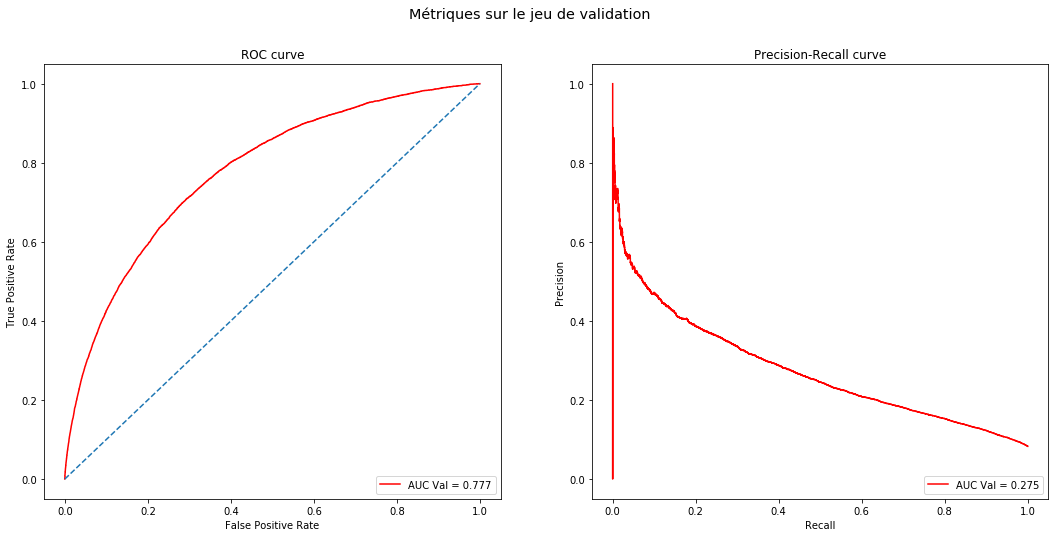

In [30]:
# Calculating test AUC
fpr_val, tpr_val, thr_val = roc_curve(y_val, y_pred_val)
roc_auc_val = auc(fpr_val, tpr_val)
precision_val, recall_val, threshold_val = precision_recall_curve(y_val, y_pred_val)
pr_auc_val = auc(recall_val, precision_val)

size = 1
nbPlot = 2
fig = plt.figure(figsize=(size * (18 * nbPlot/2), size * 8))

sub = fig.add_subplot(1,nbPlot,1)
sub.set_title('ROC curve')
plt.plot(fpr_val,tpr_val, label = 'AUC Val = %0.3f' % roc_auc_val, color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

sub = fig.add_subplot(1,nbPlot,2)
sub.set_title('Precision-Recall curve')
plt.plot(recall_val, precision_val, label = 'AUC Val = %0.3f' % pr_auc_val, color='red')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.xlabel('Recall')
plt.ylabel('Precision')


plt.rcParams.update({'font.size':12, 'font.style':'normal'})
plt.suptitle('Métriques sur le jeu de validation')

plt.show()


## Serie de 10000 train-test sur le jeu complet d'entrainement

In [62]:
results_tmp = []

In [63]:
dfApplication = load(open('dfApplicationTrain.pkl','rb'))
dfApplicationVal = load(open('dfApplicationVal.pkl','rb'))

In [64]:
dfApplication = dfApplication[cols]
dfApplicationVal = dfApplicationVal[cols]

In [65]:
dfApplication = pd.concat([dfApplication,dfApplicationVal])

In [66]:
dfApplication.shape

(289444, 124)

In [77]:
np.arange(3000)+3000

array([3000, 3001, 3002, ..., 5997, 5998, 5999])

In [78]:
for rnd in np.arange(3000)+3000:
    print(rnd)
    print(datetime.datetime.now())
    res = evaluateRocPrCurves(dfApplication, 
                              model=model, 
                              title_plot=str(rnd), 
                              display_plot=False, 
                              target='TARGET', 
                              identifier='SK_ID_CURR', 
                              defaultCatImputer = SimpleImputer(strategy='most_frequent'),
                              defaultOrdImputer = SimpleImputer(strategy='most_frequent'),
                              defaultNumImputer = SimpleImputer(strategy='mean'),                                            
                              power=power, quantile=quantile, kbins10=kbins10, kbins50=kbins50, kbins100=kbins100,
                              defaultScaler=MinMaxScaler(),
                              minmax=minmax, standard=standard, robust=robust,
                              random_state=rnd)
    results_tmp.append(res)
print(datetime.datetime.now())

3000
2021-07-10 22:04:01.646629
3001
2021-07-10 22:04:18.444003
3002
2021-07-10 22:04:34.086220
3003
2021-07-10 22:04:49.889334
3004
2021-07-10 22:05:05.521973
3005
2021-07-10 22:05:21.602964
3006
2021-07-10 22:05:37.232597
3007
2021-07-10 22:05:52.860966
3008
2021-07-10 22:06:08.493204
3009
2021-07-10 22:06:24.165369
3010
2021-07-10 22:06:39.899456
3011
2021-07-10 22:06:55.636236
3012
2021-07-10 22:07:11.445950
3013
2021-07-10 22:07:27.783416
3014
2021-07-10 22:07:43.376435
3015
2021-07-10 22:07:59.036468
3016
2021-07-10 22:08:14.669081
3017
2021-07-10 22:08:30.581104
3018
2021-07-10 22:08:46.350264
3019
2021-07-10 22:09:02.305706
3020
2021-07-10 22:09:18.305013
3021
2021-07-10 22:09:35.002435
3022
2021-07-10 22:09:51.074512
3023
2021-07-10 22:10:07.454034
3024
2021-07-10 22:10:23.254875
3025
2021-07-10 22:10:39.582532
3026
2021-07-10 22:10:56.403256
3027
2021-07-10 22:11:13.358614
3028
2021-07-10 22:11:29.744548
3029
2021-07-10 22:11:45.941145
3030
2021-07-10 22:12:02.482797
3031
202

3257
2021-07-10 23:12:03.495792
3258
2021-07-10 23:12:19.291170
3259
2021-07-10 23:12:35.136313
3260
2021-07-10 23:12:50.791654
3261
2021-07-10 23:13:06.564980
3262
2021-07-10 23:13:22.354378
3263
2021-07-10 23:13:38.140589
3264
2021-07-10 23:13:53.775229
3265
2021-07-10 23:14:09.481325
3266
2021-07-10 23:14:25.325457
3267
2021-07-10 23:14:41.784784
3268
2021-07-10 23:14:57.369273
3269
2021-07-10 23:15:13.006625
3270
2021-07-10 23:15:28.883734
3271
2021-07-10 23:15:44.651192
3272
2021-07-10 23:16:00.410692
3273
2021-07-10 23:16:16.148782
3274
2021-07-10 23:16:31.961593
3275
2021-07-10 23:16:47.875284
3276
2021-07-10 23:17:03.600247
3277
2021-07-10 23:17:19.353113
3278
2021-07-10 23:17:35.140892
3279
2021-07-10 23:17:50.858575
3280
2021-07-10 23:18:06.661831
3281
2021-07-10 23:18:22.357852
3282
2021-07-10 23:18:38.521082
3283
2021-07-10 23:18:54.203539
3284
2021-07-10 23:19:09.909830
3285
2021-07-10 23:19:25.706939
3286
2021-07-10 23:19:41.305234
3287
2021-07-10 23:19:56.917033
3288
202

3514
2021-07-11 00:19:40.458494
3515
2021-07-11 00:19:56.298307
3516
2021-07-11 00:20:12.121780
3517
2021-07-11 00:20:27.863215
3518
2021-07-11 00:20:43.622255
3519
2021-07-11 00:20:59.372795
3520
2021-07-11 00:21:15.287356
3521
2021-07-11 00:21:30.887870
3522
2021-07-11 00:21:46.571682
3523
2021-07-11 00:22:02.205551
3524
2021-07-11 00:22:17.850062
3525
2021-07-11 00:22:33.385393
3526
2021-07-11 00:22:49.049969
3527
2021-07-11 00:23:05.213919
3528
2021-07-11 00:23:21.819212
3529
2021-07-11 00:23:37.404461
3530
2021-07-11 00:23:53.328221
3531
2021-07-11 00:24:09.011716
3532
2021-07-11 00:24:24.873461
3533
2021-07-11 00:24:40.807545
3534
2021-07-11 00:24:56.470257
3535
2021-07-11 00:25:12.145042
3536
2021-07-11 00:25:27.917232
3537
2021-07-11 00:25:43.534647
3538
2021-07-11 00:25:59.428174
3539
2021-07-11 00:26:15.235518
3540
2021-07-11 00:26:30.977770
3541
2021-07-11 00:26:47.547891
3542
2021-07-11 00:27:03.138025
3543
2021-07-11 00:27:19.101039
3544
2021-07-11 00:27:34.857354
3545
202

3771
2021-07-11 01:27:22.564536
3772
2021-07-11 01:27:38.207361
3773
2021-07-11 01:27:54.091953
3774
2021-07-11 01:28:09.610709
3775
2021-07-11 01:28:25.380108
3776
2021-07-11 01:28:41.167127
3777
2021-07-11 01:28:56.923613
3778
2021-07-11 01:29:12.540156
3779
2021-07-11 01:29:28.232534
3780
2021-07-11 01:29:44.070545
3781
2021-07-11 01:30:00.346134
3782
2021-07-11 01:30:15.987943
3783
2021-07-11 01:30:31.795225
3784
2021-07-11 01:30:47.646844
3785
2021-07-11 01:31:03.343058
3786
2021-07-11 01:31:19.008797
3787
2021-07-11 01:31:34.799995
3788
2021-07-11 01:31:50.520252
3789
2021-07-11 01:32:06.335602
3790
2021-07-11 01:32:22.130644
3791
2021-07-11 01:32:37.901787
3792
2021-07-11 01:32:53.685346
3793
2021-07-11 01:33:09.523345
3794
2021-07-11 01:33:25.468271
3795
2021-07-11 01:33:41.044929
3796
2021-07-11 01:33:56.845336
3797
2021-07-11 01:34:12.900994
3798
2021-07-11 01:34:28.667222
3799
2021-07-11 01:34:44.648066
3800
2021-07-11 01:35:00.235499
3801
2021-07-11 01:35:15.897548
3802
202

4028
2021-07-11 02:35:03.476380
4029
2021-07-11 02:35:19.139991
4030
2021-07-11 02:35:35.022302
4031
2021-07-11 02:35:50.876612
4032
2021-07-11 02:36:06.620664
4033
2021-07-11 02:36:22.297347
4034
2021-07-11 02:36:38.777198
4035
2021-07-11 02:36:54.720660
4036
2021-07-11 02:37:10.866359
4037
2021-07-11 02:37:26.468101
4038
2021-07-11 02:37:42.452313
4039
2021-07-11 02:37:58.130281
4040
2021-07-11 02:38:13.987314
4041
2021-07-11 02:38:29.935853
4042
2021-07-11 02:38:45.941147
4043
2021-07-11 02:39:01.738806
4044
2021-07-11 02:39:17.247207
4045
2021-07-11 02:39:33.182367
4046
2021-07-11 02:39:48.899184
4047
2021-07-11 02:40:04.689841
4048
2021-07-11 02:40:20.492195
4049
2021-07-11 02:40:36.674894
4050
2021-07-11 02:40:52.434365
4051
2021-07-11 02:41:08.094294
4052
2021-07-11 02:41:23.727472
4053
2021-07-11 02:41:39.421436
4054
2021-07-11 02:41:55.082019
4055
2021-07-11 02:42:10.685564
4056
2021-07-11 02:42:26.402028
4057
2021-07-11 02:42:43.264297
4058
2021-07-11 02:42:58.934432
4059
202

4285
2021-07-11 03:42:48.783576
4286
2021-07-11 03:43:04.527358
4287
2021-07-11 03:43:20.811959
4288
2021-07-11 03:43:37.189908
4289
2021-07-11 03:43:52.983114
4290
2021-07-11 03:44:08.846666
4291
2021-07-11 03:44:24.711830
4292
2021-07-11 03:44:40.476739
4293
2021-07-11 03:44:56.405144
4294
2021-07-11 03:45:12.060731
4295
2021-07-11 03:45:27.896386
4296
2021-07-11 03:45:43.610573
4297
2021-07-11 03:45:59.341299
4298
2021-07-11 03:46:14.923485
4299
2021-07-11 03:46:30.777558
4300
2021-07-11 03:46:46.781911
4301
2021-07-11 03:47:02.392599
4302
2021-07-11 03:47:18.343323
4303
2021-07-11 03:47:34.074113
4304
2021-07-11 03:47:49.986209
4305
2021-07-11 03:48:05.535263
4306
2021-07-11 03:48:21.235392
4307
2021-07-11 03:48:37.116315
4308
2021-07-11 03:48:53.131500
4309
2021-07-11 03:49:08.895012
4310
2021-07-11 03:49:25.115472
4311
2021-07-11 03:49:40.858322
4312
2021-07-11 03:49:56.805283
4313
2021-07-11 03:50:12.681084
4314
2021-07-11 03:50:28.540800
4315
2021-07-11 03:50:44.391294
4316
202

4542
2021-07-11 04:50:36.549897
4543
2021-07-11 04:50:52.456579
4544
2021-07-11 04:51:08.121069
4545
2021-07-11 04:51:23.973265
4546
2021-07-11 04:51:39.775043
4547
2021-07-11 04:51:55.596385
4548
2021-07-11 04:52:11.418656
4549
2021-07-11 04:52:27.420523
4550
2021-07-11 04:52:43.195772
4551
2021-07-11 04:52:58.881674
4552
2021-07-11 04:53:14.477639
4553
2021-07-11 04:53:30.109454
4554
2021-07-11 04:53:45.979067
4555
2021-07-11 04:54:02.099743
4556
2021-07-11 04:54:17.782938
4557
2021-07-11 04:54:33.577086
4558
2021-07-11 04:54:49.220908
4559
2021-07-11 04:55:04.999927
4560
2021-07-11 04:55:20.776229
4561
2021-07-11 04:55:36.731295
4562
2021-07-11 04:55:52.645023
4563
2021-07-11 04:56:08.493919
4564
2021-07-11 04:56:24.298813
4565
2021-07-11 04:56:40.034894
4566
2021-07-11 04:56:55.726894
4567
2021-07-11 04:57:11.467642
4568
2021-07-11 04:57:27.912576
4569
2021-07-11 04:57:43.465818
4570
2021-07-11 04:57:59.260040
4571
2021-07-11 04:58:15.191425
4572
2021-07-11 04:58:31.047795
4573
202

4799
2021-07-11 05:58:20.502937
4800
2021-07-11 05:58:36.697212
4801
2021-07-11 05:58:52.600273
4802
2021-07-11 05:59:08.477565
4803
2021-07-11 05:59:24.158157
4804
2021-07-11 05:59:39.965625
4805
2021-07-11 05:59:55.814778
4806
2021-07-11 06:00:11.788085
4807
2021-07-11 06:00:27.560132
4808
2021-07-11 06:00:43.694710
4809
2021-07-11 06:00:59.364794
4810
2021-07-11 06:01:15.150781
4811
2021-07-11 06:01:30.918113
4812
2021-07-11 06:01:46.601495
4813
2021-07-11 06:02:02.463247
4814
2021-07-11 06:02:18.310397
4815
2021-07-11 06:02:34.971750
4816
2021-07-11 06:02:51.037041
4817
2021-07-11 06:03:06.779834
4818
2021-07-11 06:03:22.536966
4819
2021-07-11 06:03:38.427436
4820
2021-07-11 06:03:54.131574
4821
2021-07-11 06:04:09.839647
4822
2021-07-11 06:04:25.500834
4823
2021-07-11 06:04:42.165812
4824
2021-07-11 06:04:58.100969
4825
2021-07-11 06:05:13.861800
4826
2021-07-11 06:05:29.636032
4827
2021-07-11 06:05:45.496158
4828
2021-07-11 06:06:01.117576
4829
2021-07-11 06:06:16.923021
4830
202

5056
2021-07-11 07:09:52.978256
5057
2021-07-11 07:10:16.331192
5058
2021-07-11 07:10:42.072081
5059
2021-07-11 07:11:05.673150
5060
2021-07-11 07:11:26.965320
5061
2021-07-11 07:11:49.731012
5062
2021-07-11 07:12:13.862156
5063
2021-07-11 07:12:38.017054
5064
2021-07-11 07:13:01.865523
5065
2021-07-11 07:13:24.112935
5066
2021-07-11 07:13:45.279650
5067
2021-07-11 07:14:06.166870
5068
2021-07-11 07:14:27.590411
5069
2021-07-11 07:14:48.933676
5070
2021-07-11 07:15:11.219282
5071
2021-07-11 07:15:33.006251
5072
2021-07-11 07:15:54.079765
5073
2021-07-11 07:16:15.745171
5074
2021-07-11 07:16:37.754174
5075
2021-07-11 07:17:04.935496
5076
2021-07-11 07:17:28.258573
5077
2021-07-11 07:17:54.583909
5078
2021-07-11 07:18:18.811851
5079
2021-07-11 07:18:39.848209
5080
2021-07-11 07:19:01.968580
5081
2021-07-11 07:19:23.043030
5082
2021-07-11 07:19:43.666100
5083
2021-07-11 07:20:04.600432
5084
2021-07-11 07:20:26.463682
5085
2021-07-11 07:20:49.451383
5086
2021-07-11 07:21:11.532636
5087
202

5313
2021-07-11 08:36:37.208025
5314
2021-07-11 08:36:57.229970
5315
2021-07-11 08:37:17.758581
5316
2021-07-11 08:37:39.712153
5317
2021-07-11 08:38:01.131145
5318
2021-07-11 08:38:21.347233
5319
2021-07-11 08:38:42.604424
5320
2021-07-11 08:39:04.216508
5321
2021-07-11 08:39:28.422958
5322
2021-07-11 08:39:51.599417
5323
2021-07-11 08:40:07.286730
5324
2021-07-11 08:40:22.976922
5325
2021-07-11 08:40:38.700459
5326
2021-07-11 08:40:54.431388
5327
2021-07-11 08:41:11.458458
5328
2021-07-11 08:41:27.777565
5329
2021-07-11 08:41:44.125756
5330
2021-07-11 08:42:02.386384
5331
2021-07-11 08:42:20.768627
5332
2021-07-11 08:42:36.799506
5333
2021-07-11 08:42:53.400921
5334
2021-07-11 08:43:11.541146
5335
2021-07-11 08:43:27.571091
5336
2021-07-11 08:43:44.532094
5337
2021-07-11 08:44:00.422848
5338
2021-07-11 08:44:16.461458
5339
2021-07-11 08:44:33.318109
5340
2021-07-11 08:44:50.161414
5341
2021-07-11 08:45:07.733573
5342
2021-07-11 08:45:26.184472
5343
2021-07-11 08:45:45.026843
5344
202

5570
2021-07-11 10:00:58.215229
5571
2021-07-11 10:01:13.976620
5572
2021-07-11 10:01:29.871576
5573
2021-07-11 10:01:45.749412
5574
2021-07-11 10:02:01.560487
5575
2021-07-11 10:02:17.179496
5576
2021-07-11 10:02:32.836309
5577
2021-07-11 10:02:48.693318
5578
2021-07-11 10:03:04.980319
5579
2021-07-11 10:03:20.630578
5580
2021-07-11 10:03:36.383521
5581
2021-07-11 10:03:51.978903
5582
2021-07-11 10:04:07.749339
5583
2021-07-11 10:04:23.415296
5584
2021-07-11 10:04:39.028821
5585
2021-07-11 10:04:55.414534
5586
2021-07-11 10:05:11.158107
5587
2021-07-11 10:05:26.827248
5588
2021-07-11 10:05:42.443531
5589
2021-07-11 10:05:58.051688
5590
2021-07-11 10:06:13.751492
5591
2021-07-11 10:06:29.394793
5592
2021-07-11 10:06:45.143154
5593
2021-07-11 10:07:01.069366
5594
2021-07-11 10:07:16.800317
5595
2021-07-11 10:07:32.412680
5596
2021-07-11 10:07:48.087774
5597
2021-07-11 10:08:03.643742
5598
2021-07-11 10:08:19.389590
5599
2021-07-11 10:08:35.091493
5600
2021-07-11 10:08:50.928352
5601
202

5827
2021-07-11 11:14:22.232171
5828
2021-07-11 11:14:38.087913
5829
2021-07-11 11:14:53.965024
5830
2021-07-11 11:15:09.633762
5831
2021-07-11 11:15:25.286499
5832
2021-07-11 11:15:41.551852
5833
2021-07-11 11:15:57.120639
5834
2021-07-11 11:16:12.647344
5835
2021-07-11 11:16:28.251052
5836
2021-07-11 11:16:43.842509
5837
2021-07-11 11:16:59.693505
5838
2021-07-11 11:17:15.345164
5839
2021-07-11 11:17:31.170573
5840
2021-07-11 11:17:46.926158
5841
2021-07-11 11:18:02.543628
5842
2021-07-11 11:18:18.379416
5843
2021-07-11 11:18:34.139849
5844
2021-07-11 11:18:49.888735
5845
2021-07-11 11:19:05.702740
5846
2021-07-11 11:19:21.323931
5847
2021-07-11 11:19:37.089094
5848
2021-07-11 11:19:52.846074
5849
2021-07-11 11:20:08.512338
5850
2021-07-11 11:20:24.266814
5851
2021-07-11 11:20:39.944309
5852
2021-07-11 11:20:55.878368
5853
2021-07-11 11:21:11.611642
5854
2021-07-11 11:21:27.956763
5855
2021-07-11 11:21:44.406754
5856
2021-07-11 11:22:00.236728
5857
2021-07-11 11:22:15.986370
5858
202

In [79]:
dump(results_tmp, open('results_tmp.pkl','wb'))

In [5]:
if True:
    results_tmp = load(open('results_tmp.pkl', 'rb'))

In [80]:
results = pd.concat(results_tmp).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

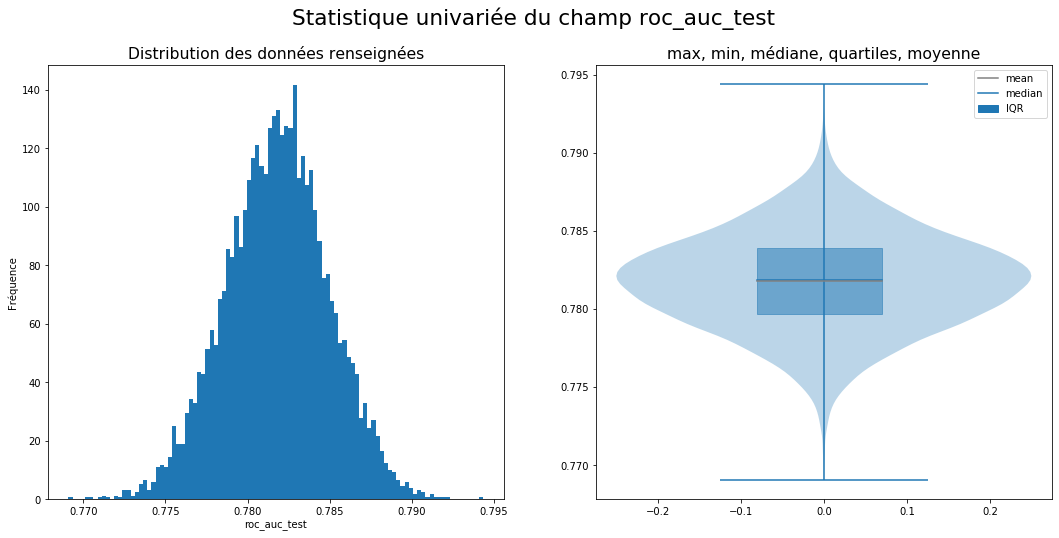

Mesures de position
 - Moyenne: 0.7818
 - Médiane: 0.78186
Mesures de dispertion
 - Ecart type: 0.00314
 - Min: 0.76908
 - Q25: 0.77971
 - Q75: 0.78389
 - Max: 0.79439
Mesures de forme
 - Skewness (asymétrie): -0.064
 - Kurtosis (applatissement): 0.056


In [82]:
myDf(results).Stat('roc_auc_test', violinPlot=True)

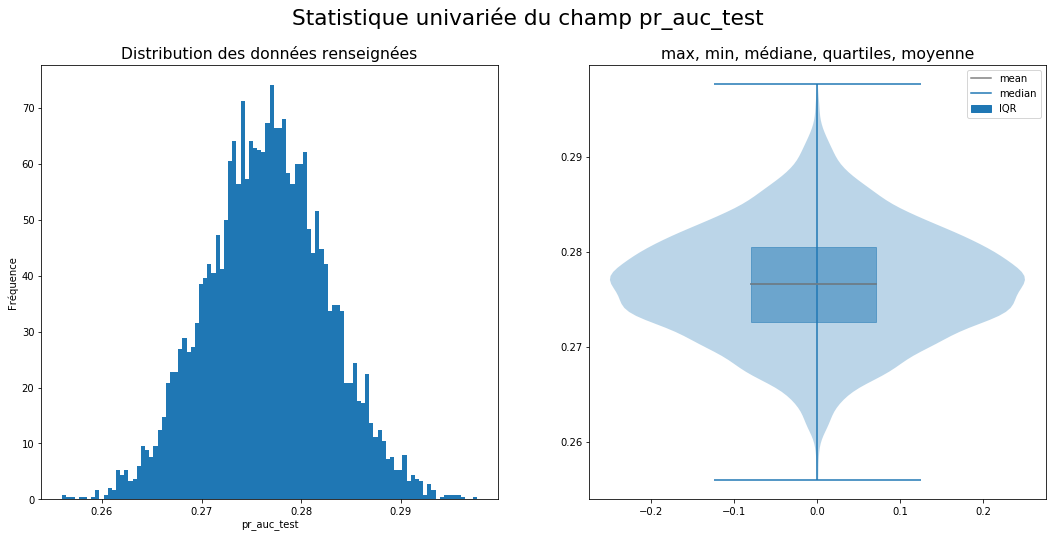

Mesures de position
 - Moyenne: 0.27659
 - Médiane: 0.27664
Mesures de dispertion
 - Ecart type: 0.00597
 - Min: 0.25601
 - Q25: 0.27264
 - Q75: 0.28054
 - Max: 0.29766
Mesures de forme
 - Skewness (asymétrie): 0.032
 - Kurtosis (applatissement): -0.06


In [83]:
myDf(results).Stat('pr_auc_test', violinPlot=True)

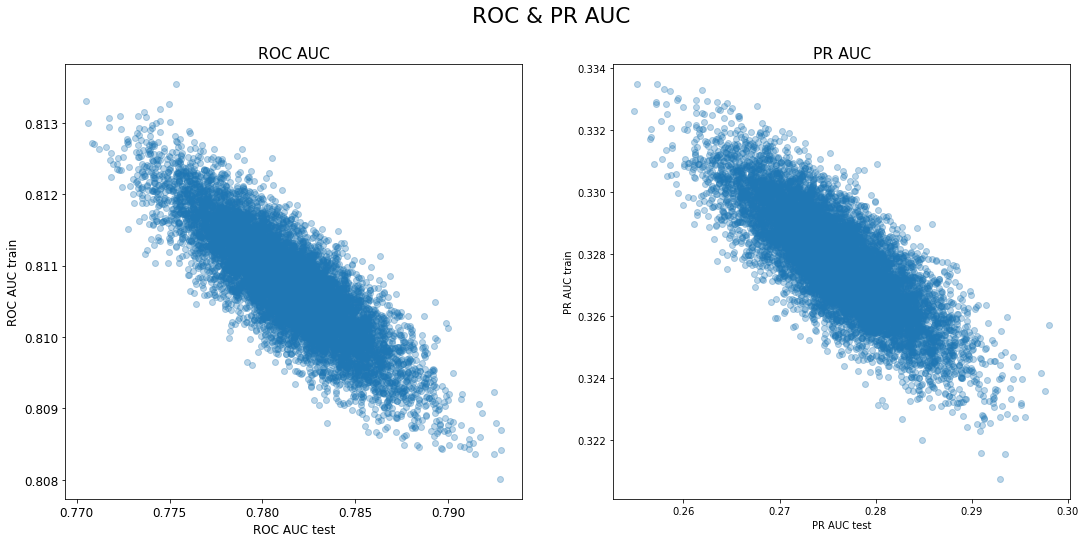

In [10]:
plt.rcParams.update({'font.size':12})

fig = plt.figure(figsize=(1 * (18 * 2/2), 1 * 8))

# 1 - Affichage d'un scatter plot
sub = fig.add_subplot(1,2,1)
plt.rcParams.update({'font.size':13, 'font.style':'italic'})
sub.set_title('ROC AUC')

plt.rcParams.update({'font.size':10, 'font.style':'normal'})
plt.scatter(results.roc_auc_test, results.roc_auc_train, alpha=0.3)
plt.gca().set_xlabel('ROC AUC test')
plt.gca().set_ylabel('ROC AUC train')

# 2 - Affichage de boites parallèles
sub = fig.add_subplot(1,2,2)
plt.rcParams.update({'font.size':13, 'font.style':'italic'})
sub.set_title('PR AUC')

plt.rcParams.update({'font.size':10, 'font.style':'normal'})
plt.scatter(results.pr_auc_test, results.pr_auc_train, alpha=0.3)
plt.gca().set_xlabel('PR AUC test')
plt.gca().set_ylabel('PR AUC train')


plt.rcParams.update({'font.size':18})
plt.suptitle("ROC & PR AUC")

plt.show()
